### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [139]:
data = pd.read_csv('data/coupons.csv')

In [140]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [141]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Determine all possible values for each volumn

In [142]:
for column in data.columns.to_list():
    print(f"{column}: {data[column].unique()}")

destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
temperature: [55 80 30]
time: ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration: ['1d' '2h']
gender: ['Female' 'Male']
age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children: [1 0]
education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Soci

3. Decide what to do about your missing data -- drop, replace, other...

The 'car' column contains 12576 out of 12684 missing data, so it does not provide us with any meaningful data and therefore we will not consider it in our study. Since most column contains string value instead of numerical values, I would like to print out all the possible value for each column.  This will give me a better sense how to visualize the data.

4. What proportion of the total observations chose to accept the coupon?



In [143]:
accepted_proportion = data.query('Y == 1').shape[0] / data.shape[0]
accepted_proportion

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

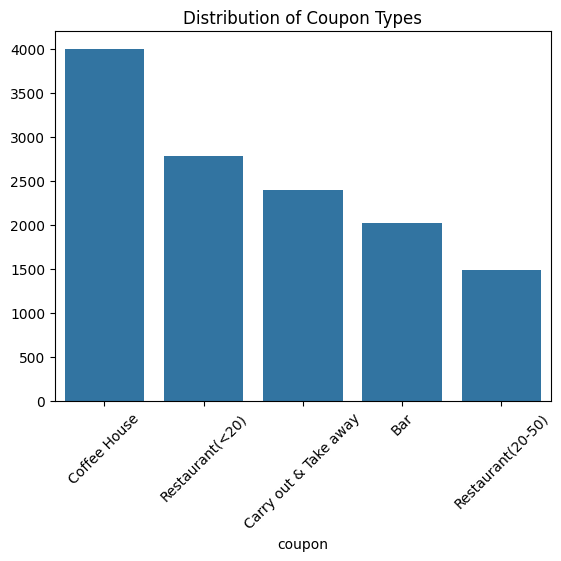

<Figure size 640x480 with 0 Axes>

In [144]:
sns.barplot(x=data['coupon'].value_counts().index, y=data['coupon'].value_counts().values)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of Coupon Types')
plt.show()
plt.savefig('images/coupon_hist.png')

6. Use a histogram to visualize the temperature column.

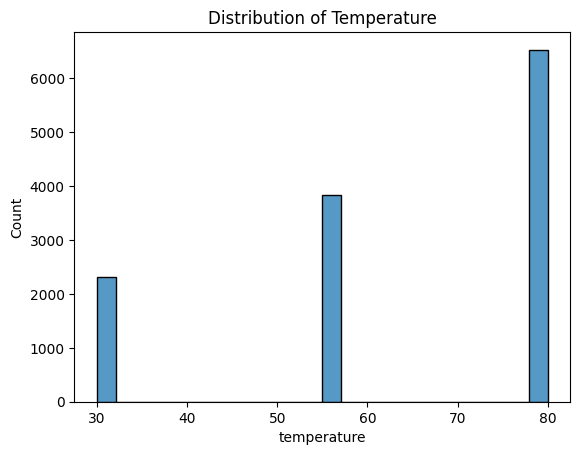

<Figure size 640x480 with 0 Axes>

In [145]:
sns.histplot(data['temperature'])
plt.title('Distribution of Temperature')
plt.show()
plt.savefig('images/temperature_hist.png')

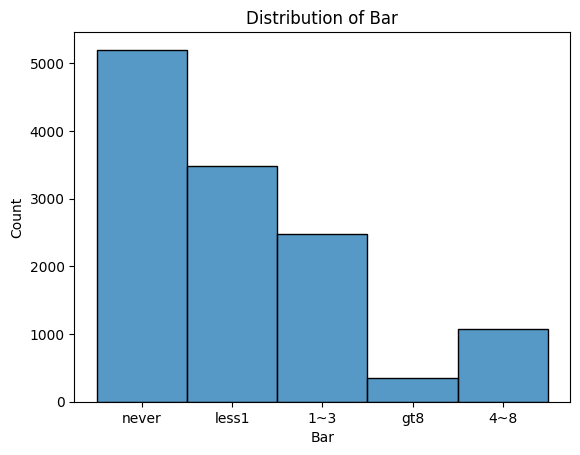

<Figure size 640x480 with 0 Axes>

In [146]:
sns.histplot(data['Bar'])
plt.title('Distribution of Bar')
plt.show()
plt.savefig('images/bar_hist.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [147]:
bar_data = data.query('coupon == "Bar"')
bar_data

destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never       NaN   
13            1d  Female  21  Unmarried partner  ...        never       NaN   
17            1d  Female  21  Unmarried partner  ...        never       NaN   
24            1d    Male  21             Single  ...        less1       4~8   
35            1d    Male  21             Single  ...        less1       4~8   
...          ...     ...  ..                ...  ...          ...       ...   
12663         1d    Male  26             Single  ...        never       1~3   
12664         2h    Male  26             Single  ...        never       1~3   
12667         1d    Male  26             Single  ...        never       1~3   
12670         2h    Male  26             Single  ...        never       1~3   
12682         1d    Male  26             Single  ...        never       1~3   

      RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min  \
9                      4~8              1~3                1   
13                     4~8              1~3                1   
17                     4~8              1~3                1   
24                     4~8            less1                1   
35                     4~8            less1                1   
...                    ...              ...              ...   
12663                  4~8              1~3                1   
12664                  4~8              1~3                1   
12667                  4~8              1~3                1   
12670                  4~8              1~3                1   
12682                  4~8              1~3                1   

      toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  Y  
9                     1                 0              0             1  0  
13                    0                 0              1             0  1  
17                    1                 1              0             1  0  
24                    0                 0              0             1  1  
35                    0                 0              1             0  1  
...                 ...               ...            ...           ... ..  
12663                 1                 0              0             1  0  
12664                 1                 0              0             1  0  
12667                 1                 0              0             1  0  
12670                 1                 0              0             1  0  
12682                 1                 1              0             1  0  

[2017 rows x 26 columns]

2. What proportion of bar coupons were accepted?

Answer: 41% of bar coupons are accepted.

In [148]:
bar_accepted = bar_data.query('Y == 1')
bar_accepted_port = bar_accepted.shape[0] / bar_data.shape[0]
bar_accepted_port

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

Observation: Based on the calculations below, people who have gone to bar fewer than 3 times are more likely to accept Bar coupon.

In [149]:
lte_3 = ['never', 'less1', '1~3']
gt_3 = ['4~8', 'gt8']
gt_8 = ['4~8']
gt1 = ['1~3', '4~8', 'gt8']
age_over25 = ['46', '26', '31', '41', '50plus', '36']
age_under25 = ['21','below21']
age_under30 = ['below21', '21', '26']
age_over30 = ['46', '31', '41', '50plus', '36']
age_over40 = ['46','41', '50plus']
age_over30_under40 = ['31', '36']

# Bar acceptance rate for people who have gone to bar greater than 3 times
bar_gt_3_accepted = bar_accepted[
    bar_accepted['Bar'].isin(gt_3)
].shape[0] / bar_data.shape[0]

# Bar acceptance rate for people who have gone to bar fewer than 3 times
bar_lt_3_accepted = bar_accepted[
    bar_accepted['Bar'].isin(lte_3)
].shape[0]/ bar_data.shape[0]

print(f"Bar acceptance for people who have gone to bar greater than 3 times: {bar_gt_3_accepted}")
print(f"Bar acceptance for people who have gone to bar fewer than 3 times: {bar_lt_3_accepted}")

Bar acceptance for people who have gone to bar greater than 3 times: 0.07585523054040655
Bar acceptance for people who have gone to bar fewer than 3 times: 0.330193356470005


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Observation: The bar coupon acceptance rate for people who have gone to bar at least once and over the age of 25 is more likely to accpet the coupon compared to people who are under 25.

In [150]:
bar_over25_accepted = bar_accepted[
    (bar_accepted['Bar'].isin(gt1)) &
    (bar_accepted['age'].isin(age_over25))
].shape[0]/ bar_data.shape[0]

bar_under25_accepted = bar_accepted[
    (bar_accepted['Bar'].isin(gt1)) &
    (bar_accepted['age'].isin(age_under25))
].shape[0]/ bar_data.shape[0]

print(f"Bar acceptance for who are over 25: {bar_over25_accepted}")
print(f"Bar acceptance for who are under 25: {bar_under25_accepted}")

Bar acceptance for who are over 25: 0.14476945959345563
Bar acceptance for who are under 25: 0.05850272682201289


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [151]:
bar_gt_1_accepted = bar_accepted[
    (bar_accepted['Bar'].isin(gt1)) &
    (~bar_accepted['passanger'].isin(['Kid(s)'])) &
    (~bar_accepted['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
].shape[0]/ bar_data.shape[0]
print(f"Bar acceptance: {bar_gt_1_accepted}")

Bar acceptance: 0.19484382746653445


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [152]:
income_less50 = [
    '$37500 - $49999',
    '$12500 - $24999',
    '$25000 - $37499',
    'Less than $12500'
]
cond1 = bar_accepted[
    (bar_accepted['Bar'].isin(gt1)) &
    (bar_accepted['passanger'] != 'Kid(s)') &
    (bar_accepted['maritalStatus'] != 'Widowed')
].shape[0]/ bar_data.shape[0]
cond1
cond2 = bar_accepted[
    (bar_accepted['Bar'].isin(gt1)) &
    (bar_accepted['age'].isin(age_under30))
].shape[0]/ bar_data.shape[0]
cond2
cond3 = bar_accepted[
    (bar_accepted['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_accepted['income'].isin(income_less50))
].shape[0] / bar_accepted.shape[0]
cond3
print(f"cond1: {cond1}")
print(f"cond2: {cond2}")
print(f"cond3: {cond3}")

cond1: 0.19484382746653445
cond2: 0.12345066931085771
cond3: 0.18863361547763


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who have no kid in the car are more likely to accept the bar coupon and so do people who like to visit cheap restaurants often and have income less than 50K. Drivers who are older than 25 are more likley to accept bar coupon compared to people who are under 25. Drivers who have no kid are more likely to accept the bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Observation: First I tried to determine what kind of passanger can influence the acceptance of coupon.  Turns out drivers are more likely to accept coupons when they drive alone.

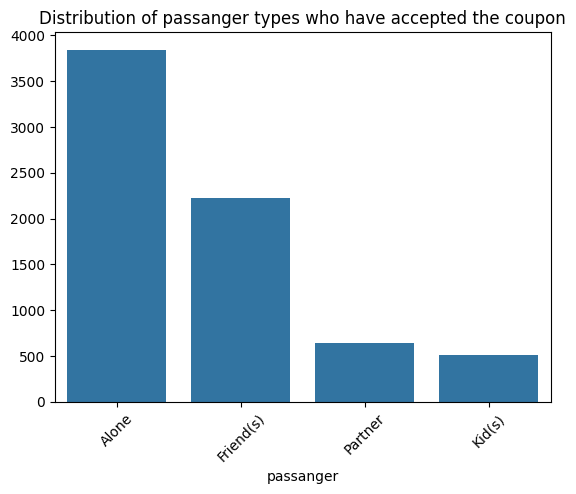

<Figure size 640x480 with 0 Axes>

In [153]:
coupon_accepted = data.query('Y == 1')
sns.barplot(
    x=coupon_accepted['passanger'].value_counts().index,
    y=coupon_accepted['passanger'].value_counts().values
)
plt.tick_params(axis='x', labelrotation=45)
plt.title('Distribution of passanger types who have accepted the coupon')
plt.show()
plt.savefig('images/passanger_hist.png')

Observations: Based on the types of passanger, I would like to know what kind of coupons the drivers are more likely to accept. It seems the most popular coupons are take out places, coffee house and cheap restaurant. Also for driver with kids, the only coupon they are interested in is take out places.

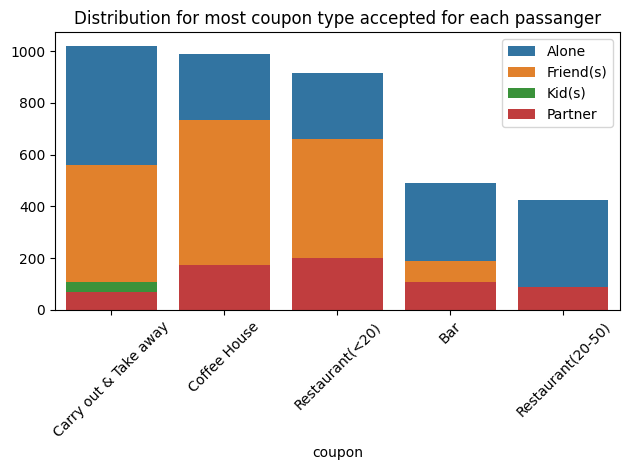

<Figure size 640x480 with 0 Axes>

In [154]:
def plot_data(data: pd.DataFrame, category: str, label: str):
    sns.barplot(
        x=data[category].value_counts().index,
        y=data[category].value_counts().values,
        label=label,
    )
    plt.tick_params(axis='x', labelrotation=45)

for passanger in data['passanger'].unique():
  plot_data(
    data=coupon_accepted[coupon_accepted['passanger'] == passanger ],
    category="coupon",
    label=passanger,
  )
plt.title("Distribution for most coupon type accepted for each passanger")
plt.tight_layout()
plt.legend()
plt.show()
plt.savefig('images/passanger_coupon_hist.png')

Since 'Carry out and Take away' coupons are most popular, I try to see how it correlates to the number of times people do take out and go to less expensive and more expensive restaurant.

Obervation: People who do take out or go to cheap restauant often will more likely to accept the CarryAway coupon.

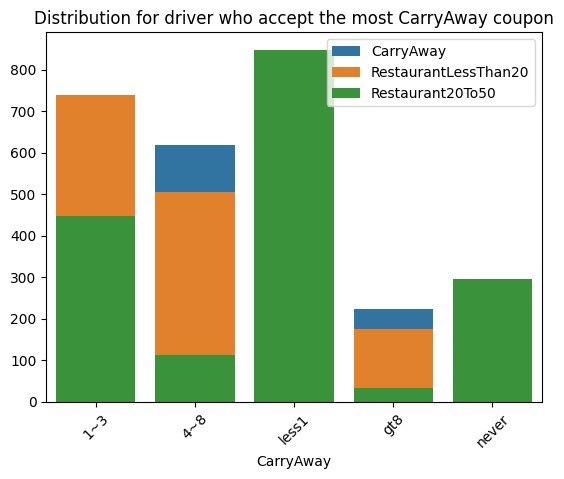

In [155]:
takeout_accepted = data[
    (data['coupon'] == 'Carry out & Take away') &
    (data['Y'] == 1)
]
plot_data(data=takeout_accepted, category='CarryAway', label='CarryAway')
plot_data(data=takeout_accepted, category='RestaurantLessThan20', label='RestaurantLessThan20')
plot_data(data=takeout_accepted, category='Restaurant20To50', label='Restaurant20To50')
plt.title("Distribution for driver who accept the most CarryAway coupon")
plt.legend()
plt.show()

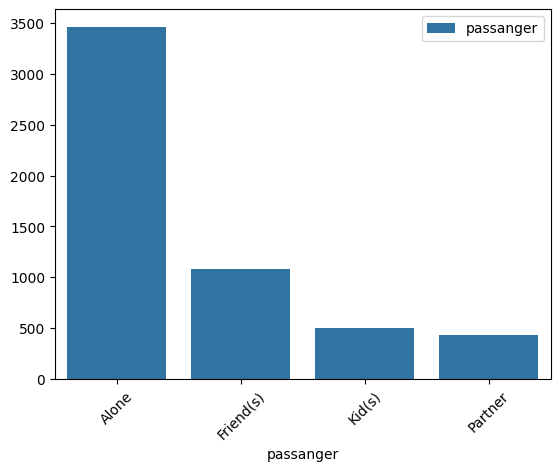

In [156]:
not_accepted = data.query('Y == 0')
plot_data(data=not_accepted, category='passanger', label='passanger')

I would like to check out to see which attribute contribute the most coupon accepted, so I write the code to graph the attribute for each column that contribute to the most coupon accepted.

Oberservation:

Here are the characteristic of drivers who are more likely to accept coupon:
*   Drivers who are not driving to urgent places
*   Drivers without passangers
*   Drivers who are under the age of 31
*   Drivers who are either single, married or with partners.
*   Drivers with income less than 63K

In [157]:
def plot_data(data: pd.DataFrame, category: str, title: str, ax: plt.Axes):
    sns.barplot(
        x=data[category].value_counts().index,
        y=data[category].value_counts().values,
        ax=ax
    )
    ax.tick_params(axis='x', labelrotation=90, labelsize=60, labelleft=True)
    ax.tick_params(axis='y', labelsize=60)
    ax.set_title(f"{category}", fontsize=60)

all_categories = data.columns.tolist()
exclude_categories = ['Y', 'car']
coupon_accepted = data.query('Y == 1')

plot_index = 0
for category in all_categories:
    if category in exclude_categories:
        continue
    else:
        if plot_index % 4 == 0:
          fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(100, 80))
        row = plot_index // 2
        col = plot_index % 2
        plot_data(
            data=coupon_accepted,
            category=category,
            title=f"{category} distribution",
            ax=axes[row, col]
        )
        plot_index += 1
        if plot_index % 4 == 0:
          plt.savefig(f"images/barplot_{plot_index / 4}.png")
          plot_index = 0

Explore how driver's age and passanger type relate to the acceptance rate of take out coupon.

In [158]:

coupon_accepted = data.query('Y == 1')
coupon_notaccepted = data.query('Y == 0')

driver_accepted = coupon_accepted[
    (coupon_accepted['passanger'] == 'Alone') &
    (coupon_accepted['coupon'] == 'Carry out & Take away')
].shape[0] / data.shape[0]

driver_notaccepted = coupon_notaccepted[
    (coupon_notaccepted['passanger'] == 'Alone') &
    (coupon_notaccepted['coupon'] == 'Carry out & Take away')
].shape[0] / data.shape[0]

print(f"driver_accept: {driver_accepted}")
print(f"driver_notaccepted: {driver_notaccepted}")

driver_under25_alone_accept = coupon_accepted[
    (coupon_accepted['passanger'] == 'Alone') &
    (coupon_accepted['age'].isin(age_under25)) &
    (coupon_accepted['coupon'] == 'Carry out & Take away')
].shape[0] / data.shape[0]

driver_under25_alone_notaccept = coupon_notaccepted[
    (coupon_notaccepted['passanger'] == 'Alone') &
    (coupon_notaccepted['age'].isin(age_under25)) &
    (coupon_notaccepted['coupon'] == 'Carry out & Take away')
].shape[0] / data.shape[0]
#print(f"driver_under25_accept: {driver_under25_alone_accept}")
#print(f"driver_under25_alone_notaccept: {driver_under25_alone_notaccept}")

driver_over30_under40_alone_accept = coupon_accepted[
    (coupon_accepted['passanger'] == 'Alone') &
    (coupon_accepted['age'].isin(age_over30)) &
    (coupon_accepted['coupon'] == 'Carry out & Take away')
].shape[0] / data[data['age'].isin(age_over30)].shape[0]

driver_under30_under40_alone_notaccept = coupon_notaccepted[
    (coupon_notaccepted['passanger'] == 'Alone') &
    (coupon_notaccepted['age'].isin(age_over30)) &
    (coupon_notaccepted['coupon'] == 'Carry out & Take away')
].shape[0] / data[data['age'].isin(age_over30)].shape[0]

print(f"driver_over30_accept: {driver_over30_under40_alone_accept}")
print(f"driver_under30_alone_notaccept: {driver_under30_under40_alone_notaccept}")

driver_accept: 0.08057395143487858
driver_notaccepted: 0.030195521917376223
driver_over30_accept: 0.07638989169675091
driver_under30_alone_notaccept: 0.028303249097472925
